In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"C:\Users\Diya\Downloads\breast_cancer_encoded_dataset.csv")  

# Display the first few rows of the dataset
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nFirst 5 Rows of Dataset:")
print(data.head())
print("\nSummary Statistics:")
print(data.describe())

Dataset Shape: (569, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   radius             569 non-null    float64
 1   texture            569 non-null    float64
 2   perimeter          569 non-null    float64
 3   area               569 non-null    float64
 4   smoothness         569 non-null    float64
 5   compactness        569 non-null    float64
 6   concavity          569 non-null    float64
 7   symmetry           569 non-null    float64
 8   Fractal_Dimension  569 non-null    float64
 9   diagnosis_encoded  569 non-null    int64  
 10  diagnosis_B        569 non-null    int64  
 11  diagnosis_M        569 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 53.5 KB
None

First 5 Rows of Dataset:
   radius  texture  perimeter    area  smoothness  compactness  concavity  \
0   17.99    10.38     1

In [13]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
symmetry             0
Fractal_Dimension    0
diagnosis_encoded    0
diagnosis_B          0
diagnosis_M          0
dtype: int64


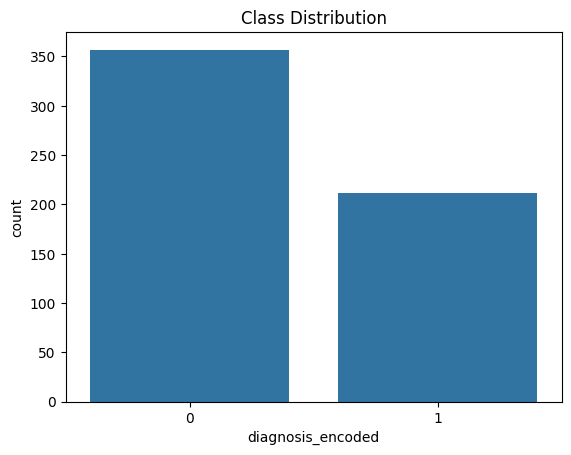

In [3]:
# Visualize class distribution
sns.countplot(x='diagnosis_encoded', data=data)
plt.title("Class Distribution")
plt.show()

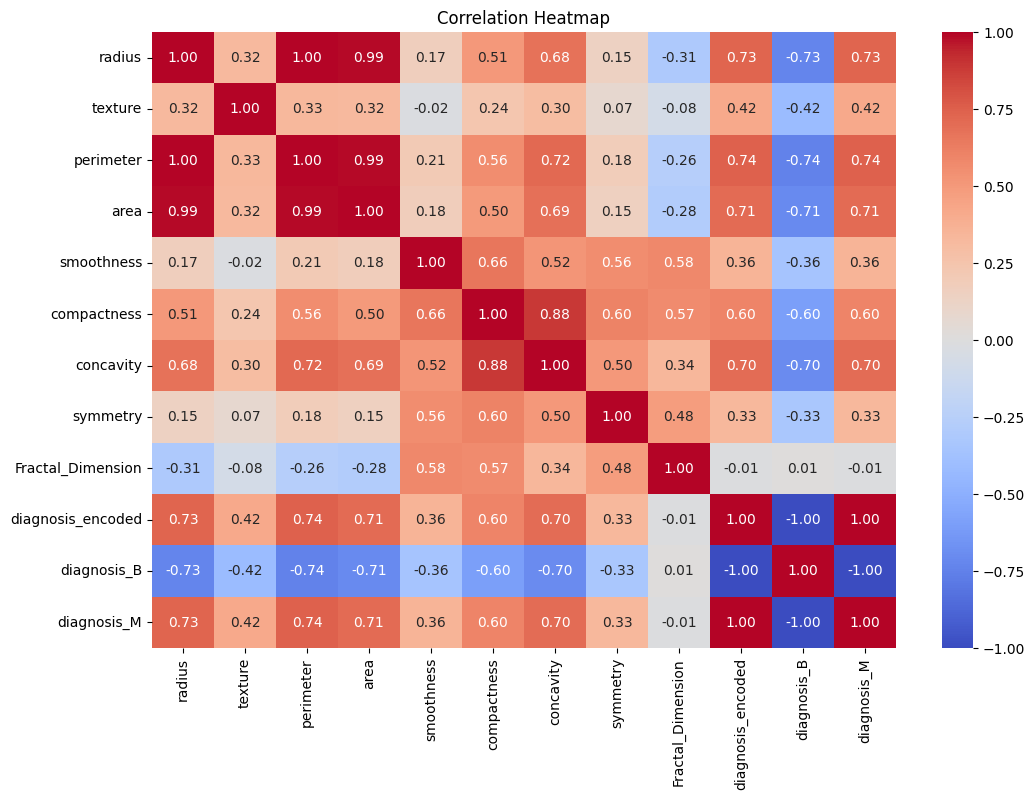

In [4]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

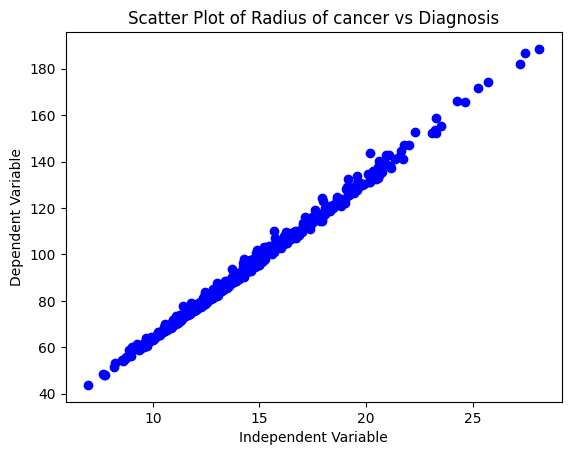

In [14]:
# Check the dependent and independent variables
# Assuming the dataset has 'X' as the independent variable and 'Y' as the dependent variable
X = data[['radius']]
y = data['perimeter']

# Visualize the change in variables
plt.scatter(X, y, color='blue')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Scatter Plot of Radius of cancer vs Diagnosis')
plt.show()

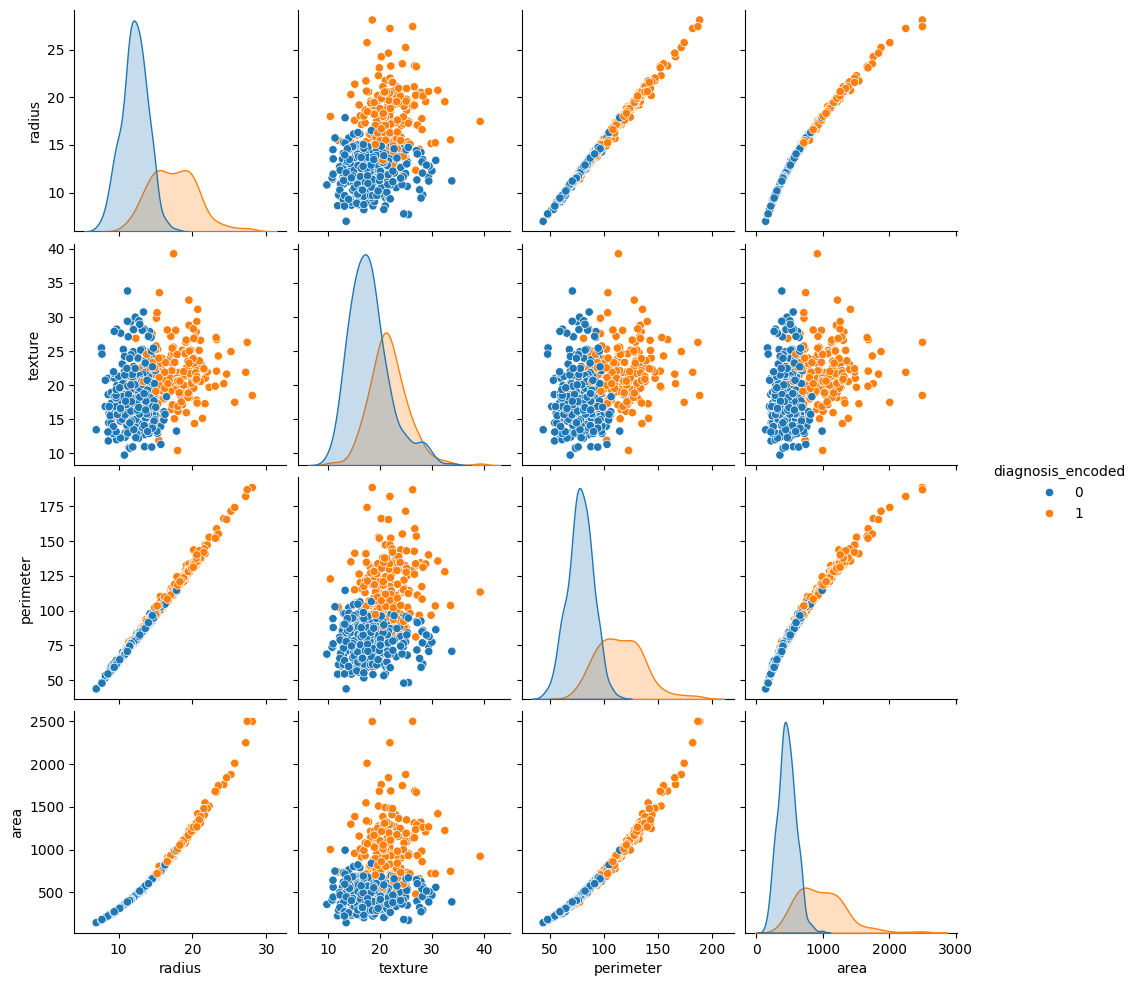

In [6]:
import seaborn as sns

# Select features and target variable for visualization
selected_features = ['radius', 'texture', 'perimeter', 'area']
sns.pairplot(data[selected_features + ['diagnosis_encoded']], hue='diagnosis_encoded', diag_kind='kde')
plt.show()

In [15]:
# 4. Preprocessing: Separating Features and Target Variable
X = data.drop(['diagnosis_encoded', 'diagnosis_B', 'diagnosis_M', 'perimeter'], axis=1)  # Features
y = data['perimeter']  # Target

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of train and test sets
print("\nTraining set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)
print("\n")


Training set shape: (455, 8) (455,)
Testing set shape: (114, 8) (114,)




In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Retrieve the intercept and coefficients
intercept = model.intercept_
slope = model.coef_

print("Intercept:", intercept)
print("Slope:", slope)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Compare predicted and actual values
comparison = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
print("\nActual vs Predicted Values:\n", comparison.head())

Intercept: 48.39854696200748
Slope: [ 1.24442448e+02 -5.02844321e-02  9.80597271e+00 -7.11110507e-01
  1.03398244e+01  2.13431537e+00 -4.76707118e-01 -2.55975324e+00]

Actual vs Predicted Values:
    Actual   Predicted
0   81.09   81.042523
1  123.60  123.873278
2  101.70  101.552081
3   81.47   81.057555
4   74.65   75.011005


In [17]:
# Evaluate the algorithm
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2 Score):", r2)


Evaluation Metrics:
Mean Absolute Error (MAE): 0.33870312482730913
Mean Squared Error (MSE): 0.3453569910550708
Root Mean Squared Error (RMSE): 0.5876708186179324
R-squared (R2 Score): 0.9994104806349742


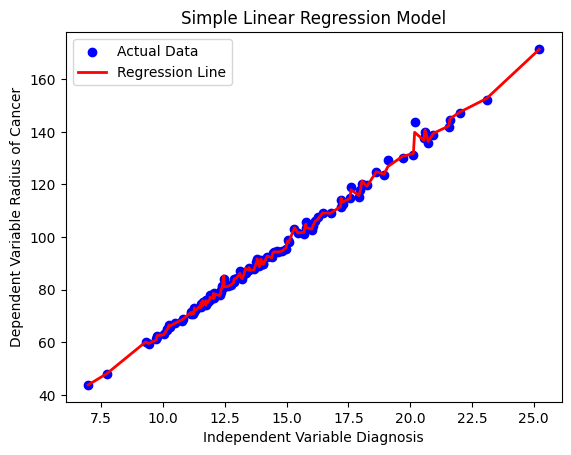

In [18]:
# Sort values for a proper regression line
sorted_indices = X_test.iloc[:, 0].argsort()
X_sorted = X_test.iloc[:, 0].iloc[sorted_indices]
y_pred_sorted = y_pred[sorted_indices]

# Scatter plot for actual data points
plt.scatter(X_test.iloc[:, 0], y_test, color='blue', label='Actual Data')

# Correctly plot the regression line
plt.plot(X_sorted, y_pred_sorted, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('Independent Variable Diagnosis')
plt.ylabel('Dependent Variable Radius of Cancer')
plt.title('Simple Linear Regression Model')
plt.legend()
plt.show()

In [11]:
# Interpretation of Regression Results

# Model Performance Metrics:

# Mean Absolute Error (MAE): 0.3387
# - The average absolute difference between actual and predicted values.
# - Lower values indicate better accuracy.

# Mean Squared Error (MSE): 0.3453
# - Measures average squared differences.
# - Since MSE is relatively low, the model performs well.

# Root Mean Squared Error (RMSE): 0.5876
# - The model’s predictions are, on average, 0.5876 units away from actual values.

# R-squared (R² Score): 0.9994
# - The model explains 99.94% of the variance in the radius of cancer 
#   based on independent variables.
# - R² > 0.60 suggests a strong model fit.

# Scatter Plot Analysis:
# - Blue dots (Actual Data) show actual perimeter values.
# - Red line (Regression Line) represents the model's predicted values.

#The model successfully predicts cancer diagnosis based on tumor characteristics.
#The most important features influencing diagnosis are radius, perimeter, and concavity
# - The R-squared value (0.9994) suggests that the model explains nearly all the variability in the data.
# - The low RMSE and MAE indicate that the model is making highly accurate predictions.